In [2]:
import pandas as pd
import seaborn as sns

In [19]:
from modlamp.descriptors import GlobalDescriptor

def get_mw(sequence):
    """Molecular Weight"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.calculate_MW(amide=True)
        return round(desc.descriptor[0][0], 4)
    except:
        return None

def get_isoelectric_point(sequence):
    """Isoelectric point"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.isoelectric_point(amide=True)
        return round(desc.descriptor[0][0], 4)
    except:
        return None

def get_charge_density(sequence):
    """Charge density"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.charge_density(ph=7, amide=True)
        return round(desc.descriptor[0][0], 5)
    except:
        return None

def get_charge(sequence):
    """Charge"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.calculate_charge(ph=7, amide=True)
        return round(desc.descriptor[0][0], 4)
    except:
        return None

def get_instability_index(sequence):
    """Instability index"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.instability_index()
        return round(desc.descriptor[0][0], 4)
    except:
        return None

def get_aromaticity(sequence):
    """Aromaticity"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.aromaticity()
        return round(desc.descriptor[0][0], 4)
    except:
        return None

def get_aliphatic_index(sequence):
    """Aliphatic index"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.aliphatic_index()
        return round(desc.descriptor[0][0], 4)
    except:
        return None

def get_boman_index(sequence):
    """Boman index"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.boman_index()
        return round(desc.descriptor[0][0], 4)
    except:
        return None

def get_hydrophobic_ratio(sequence):
    """Hydrophobic ratio"""
    try:
        desc = GlobalDescriptor([sequence])
        desc.hydrophobic_ratio()
        return round(desc.descriptor[0][0], 4)
    except:
        return None

def get_frequency_residue(sequence, residue):
    return round(sequence.count(residue)/len(sequence), ndigits=4)

In [5]:
df_experimental = pd.read_csv("../../raw_data/enzymes_plastics.csv")
df_experimental = df_experimental[df_experimental["PET"] == 1]
df_experimental.shape

(183, 43)

In [9]:
df_experimental = df_experimental[["sequence"]]
df_experimental["Source"] = "Experimental"
df_experimental.columns = ["Sequence", "Source"]
df_experimental.head(5)

,Sequence,Source
0,AANPYERGPNPTDALLEARSGPFSVSEENVSRLSASGFGGGTIYYP...,Experimental
3,AAVHGPDPTDALLEASRGPYATRQVDVSSLLVSGFGGGTIYYPTTT...,Experimental
14,ANPPGGDPDPGCQTDCNYQCGPDPTDAYLEAASGPYTVSTIRVSSL...,Experimental
15,ANPYERGPDPTESSIEAVRGPFAVAQTTVSRLQADGFGGGTIYYPT...,Experimental
16,ANPYERGPNPTDALLEARSGPFSVSEENVSRLSASGFGGGTIYYPR...,Experimental


In [10]:
df_generated = pd.read_csv("seqs_to_evaluate.csv")
df_generated = df_generated[df_generated["p1"]>0.5]
df_generated = df_generated[["sequence"]]
df_generated["Source"] = "Generated"
df_generated.columns = ["Sequence", "Source"]
df_generated

,Sequence,Source
0,MKILAPKPFTFEGGDRAVLLLHGFTGNSADVRMLGRFLEKKGYTCH...,Generated
1,MKISAPQPFTFEGGERAVLLLHGFTGNSADVRMLGRFLEKKGYTCH...,Generated
2,MTAPLILQPVKPADACVIWLHGLGADRYDFLPVAEALQESLLTTRF...,Generated
3,MSEPLILQPTKKADACVIWLHGLGADRYDFLPVAEALQQTLLTTRF...,Generated
4,MTEPLILQPVKPADACVIWLHGLGADRYDFMPVAEALQESLLSTRF...,Generated
...,...,...
2945,MLSTAVSGLAFALPSITTTTDPSVDTRQLAELENREIGATTRNDLE...,Generated
2946,MKFTALVLSILVAGSATPIETRQATAGNDLHNGACKPIILIYARAS...,Generated
2947,MKLNFIAVSLAGLVGATPVDERQLDAGSPSSELEARQFGGSTANEL...,Generated
2948,MRLSSFIVALALTGAASPIPKLQDRQLSGGSTANEFTDGGCKPITF...,Generated


In [21]:
df_all = pd.concat([df_experimental, df_generated], axis=0)
df_all.to_csv("evaluated_sequences.csv", index=False)

In [23]:
df_all["Molecular Weight"] = df_all["Sequence"].apply(
    lambda x: get_mw(x)
)

df_all["Isoelectric point"] = df_all["Sequence"].apply(
    lambda x: get_isoelectric_point(x)
)

df_all["Charge density"] = df_all["Sequence"].apply(
    lambda x: get_charge_density(x)
)

df_all["Charge"] = df_all["Sequence"].apply(
    lambda x: get_charge(x)
)

df_all["Instability index"] = df_all["Sequence"].apply(
    lambda x: get_instability_index(x)
)

df_all["Aromaticity"] = df_all["Sequence"].apply(
    lambda x: get_aromaticity(x)
)

df_all["Aliphatic index"] = df_all["Sequence"].apply(
    lambda x: get_aliphatic_index(x)
)

df_all["Boman index"] = df_all["Sequence"].apply(
    lambda x: get_boman_index(x)
)

df_all["Hydrophobic ratio"] = df_all["Sequence"].apply(
    lambda x: get_hydrophobic_ratio(x)
)

In [24]:
df_all

,Sequence,Source,Molecular Weight,Isoelectric point,Charge density,Charge,Instability index,Aromaticity,Aliphatic index,Boman index,Hydrophobic ratio
0,AANPYERGPNPTDALLEARSGPFSVSEENVSRLSASGFGGGTIYYP...,Experimental,28316.56,6.7202,-0.00002,-0.533,36.3493,0.0916,80.8779,1.4174,0.3473
3,AAVHGPDPTDALLEASRGPYATRQVDVSSLLVSGFGGGTIYYPTTT...,Experimental,27457.53,6.2456,-0.00006,-1.635,36.1074,0.0895,78.5992,1.4474,0.3502
14,ANPPGGDPDPGCQTDCNYQCGPDPTDAYLEAASGPYTVSTIRVSSL...,Experimental,31593.25,6.3326,-0.00011,-3.355,40.8524,0.0986,73.0952,1.0912,0.3503
15,ANPYERGPDPTESSIEAVRGPFAVAQTTVSRLQADGFGGGTIYYPT...,Experimental,27826.76,5.6543,-0.00013,-3.631,39.3667,0.0853,74.5736,1.6822,0.3488
16,ANPYERGPNPTDALLEARSGPFSVSEENVSRLSASGFGGGTIYYPR...,Experimental,28228.46,7.3350,0.00002,0.467,37.2866,0.0881,80.8046,1.5114,0.3448
...,...,...,...,...,...,...,...,...,...,...,...
2945,MLSTAVSGLAFALPSITTTTDPSVDTRQLAELENREIGATTRNDLE...,Generated,23765.63,5.1069,-0.00017,-4.100,18.7018,0.0573,78.2379,1.1769,0.3789
2946,MKFTALVLSILVAGSATPIETRQATAGNDLHNGACKPIILIYARAS...,Generated,20904.02,9.9342,0.00043,9.026,42.8152,0.0490,81.9608,0.7453,0.4216
2947,MKLNFIAVSLAGLVGATPVDERQLDAGSPSSELEARQFGGSTANEL...,Generated,23085.72,4.2994,-0.00047,-10.959,33.7473,0.0625,79.2857,1.0007,0.4018
2948,MRLSSFIVALALTGAASPIPKLQDRQLSGGSTANEFTDGGCKPITF...,Generated,22181.48,9.2383,0.00031,6.892,23.5054,0.0543,88.4163,0.4796,0.4615


In [25]:
df_all.to_csv("evaluated_sequences.csv", index=False)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Function to calculate amino acid proportions
def calculate_proportions(sequences):
    amino_acids = list("ARNDCEQGHILKMFPSTWYV")
    proportions = {aa: 0 for aa in amino_acids}

    total_count = 0
    for sequence in sequences:
        total_count += len(sequence)
        for aa in amino_acids:
            proportions[aa] += sequence.count(aa)
    
    # Normalize by the total count of amino acids
    proportions = {aa: (count / total_count)*100 for aa, count in proportions.items()}
    return proportions

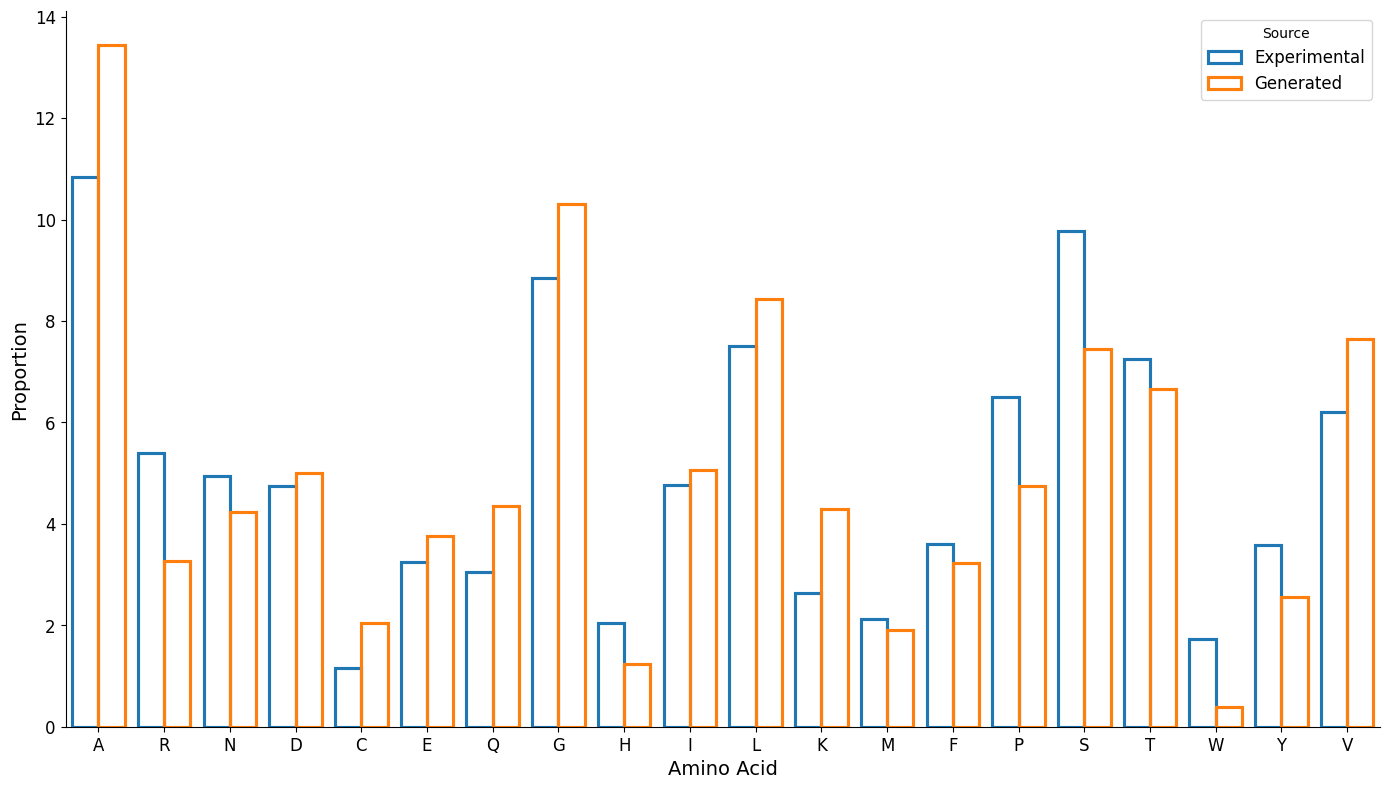

In [35]:
# Calculate proportions by Source
sources = df_all["Source"].unique()
results = []

for source in sources:
    source_sequences = df_all[df_all["Source"] == source]["Sequence"]
    proportions = calculate_proportions(source_sequences)
    for aa, prop in proportions.items():
        results.append({"Source": source, "AminoAcid": aa, "Proportion": prop})

# Create a DataFrame for plotting
results_df = pd.DataFrame(results)

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(
    data=results_df, 
    x="AminoAcid", 
    y="Proportion", 
    hue="Source", 
    dodge=True,
    fill=False
)
plt.xlabel("Amino Acid", fontsize=14)
plt.ylabel("Proportion", fontsize=14)
plt.legend(title="Source", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
sns.despine()

plt.savefig("aminoacid_frequency.png", dpi=300)

In [28]:
df_all.reset_index(inplace=True)

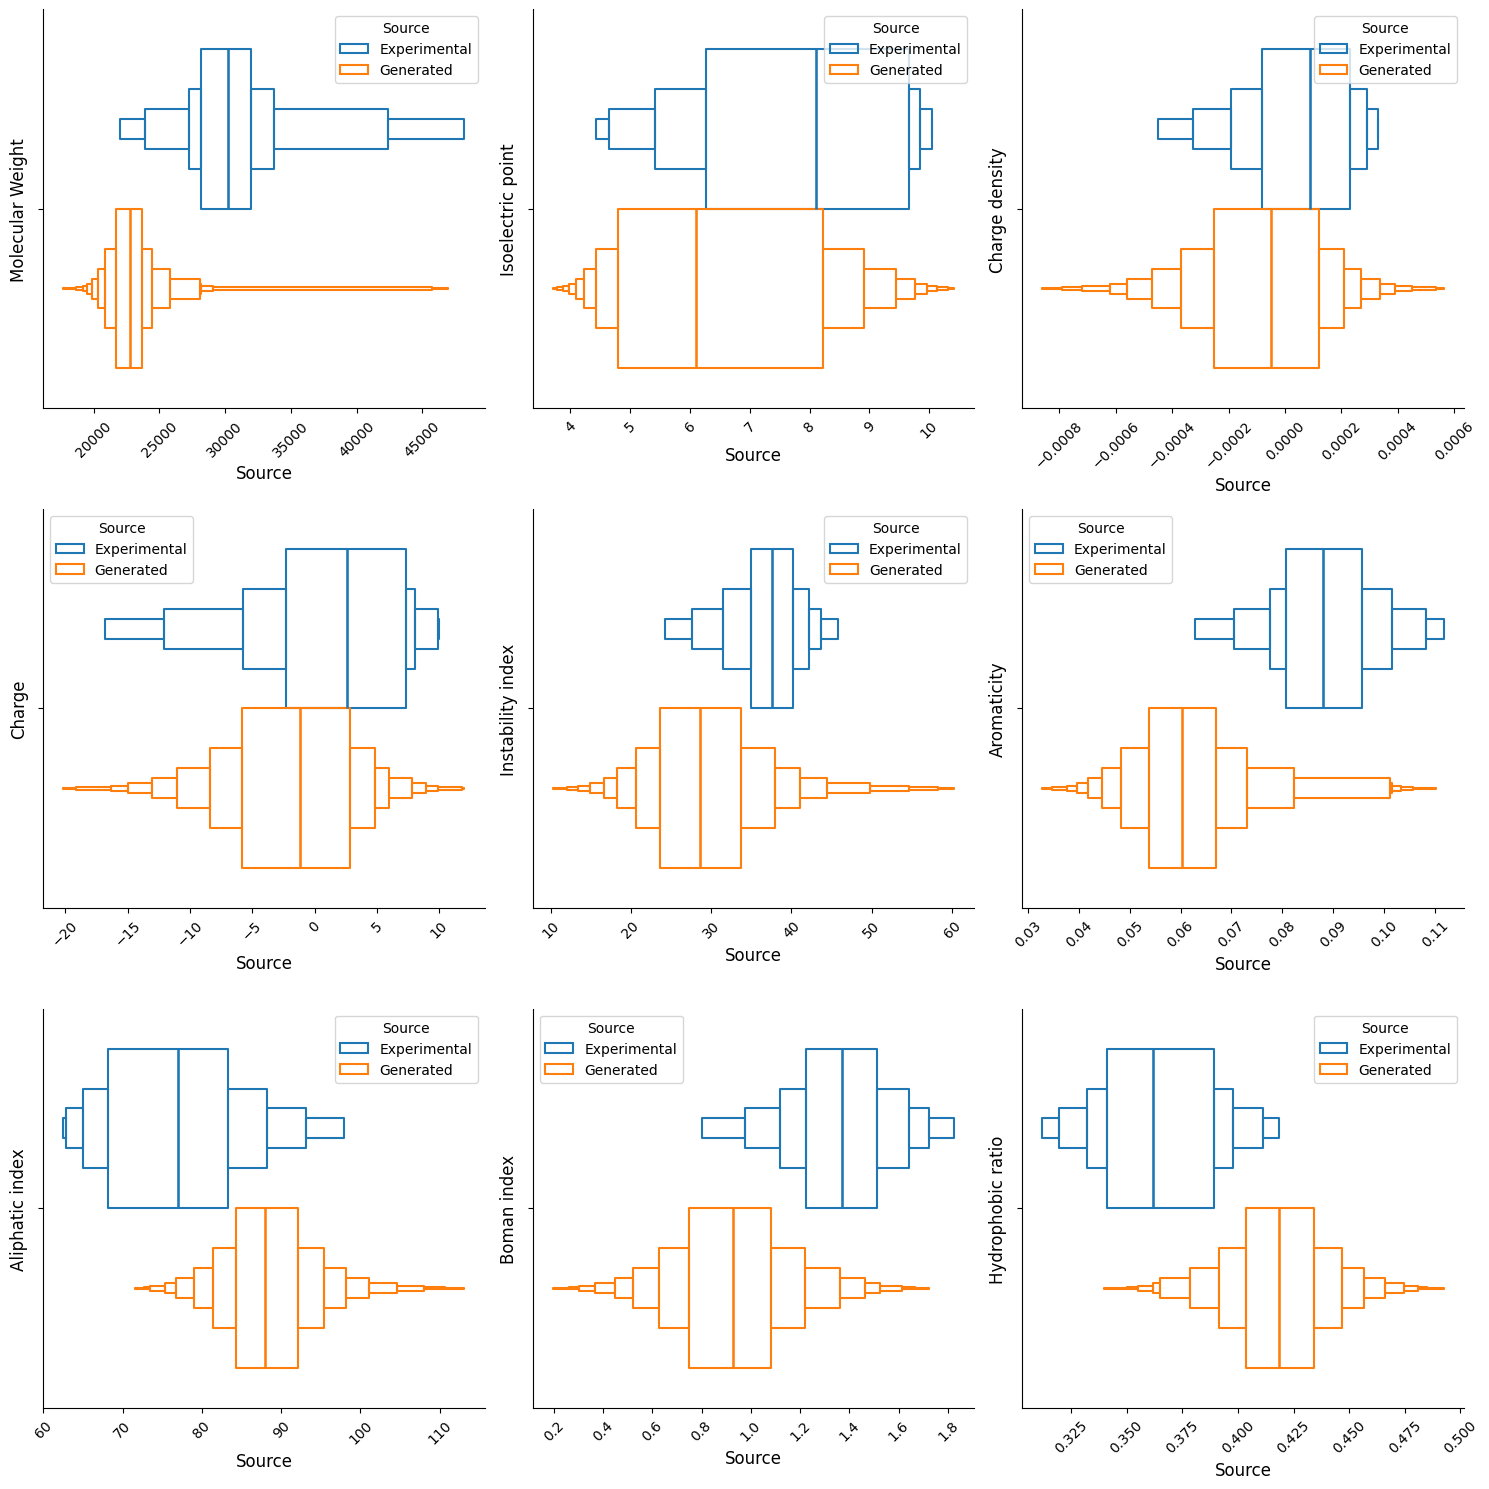

In [36]:
properties = [

    "Molecular Weight",
    "Isoelectric point",
    "Charge density",
    "Charge",
    "Instability index",
    "Aromaticity",
    "Aliphatic index",
    "Boman index",
    "Hydrophobic ratio"
]

n_properties = len(properties)
n_cols = 3  # Number of columns in the grid
n_rows = (n_properties + n_cols - 1) // n_cols  # Number of rows in the grid

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easier indexing



# Plot each property
for i, property_name in enumerate(properties):

    sns.boxenplot(data=df_all, hue="Source", x=property_name, ax=axes[i], fill=False, showfliers=False)
    axes[i].set_xlabel("Source", fontsize=12)
    axes[i].set_ylabel(property_name, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
sns.despine()
plt.tight_layout()
plt.savefig("distribution_analysis.png", dpi=300)
